In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_theme(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1.2, color_codes=True, rc=None)

## read data

In [3]:
data = pd.read_csv('../data/results-GHI-SPG.csv', names=["Date", "GHI", "SPG"], skiprows=1)
data["Date"] = data["Date"].apply(lambda x: x.split(',')[0])
print(data.head())
month_number = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}

def convert_month(date):
    assert type(date) == str, f"Expected input of type str, but got {type(date)}"
    if "-" not in date:
        month, day = date.split(' ')
        if (month in month_number):
            month = str(month_number[month])
            if len(day) == 1:
                day = f"0{day}"
            if len(month) == 1:
                month = f"0{month}"
            # print(month)
            return f"2022-{month}-{day}"
    else:
        return date
    
data["Date"] = data["Date"].apply(convert_month)
data["Date"] = pd.to_datetime(data["Date"])
print("\nNew Layout:\n")
print(data.head())

    Date  GHI      SPG
0  Jan 1    0 -1.90284
1  Jan 1    0 -1.90284
2  Jan 1    0 -1.90284
3  Jan 1    0 -1.90284
4  Jan 1    0 -1.90284

New Layout:

        Date  GHI      SPG
0 2022-01-01    0 -1.90284
1 2022-01-01    0 -1.90284
2 2022-01-01    0 -1.90284
3 2022-01-01    0 -1.90284
4 2022-01-01    0 -1.90284


In [4]:
GHI_month = data.groupby(data["Date"].dt.month)["GHI"].sum().reset_index()

days_in_month = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
H_month = GHI_month.copy().drop("GHI", axis=1)
H_month["GHI"] = (GHI_month["GHI"] * 24 / 1_000) / days_in_month
H_month

,Date,GHI
0,1,6.674323
1,2,18.528000
2,3,52.107871
3,4,99.380000
4,5,123.760258
5,6,139.614400
6,7,127.208516
7,8,98.132129
8,9,69.137600
9,10,24.806710


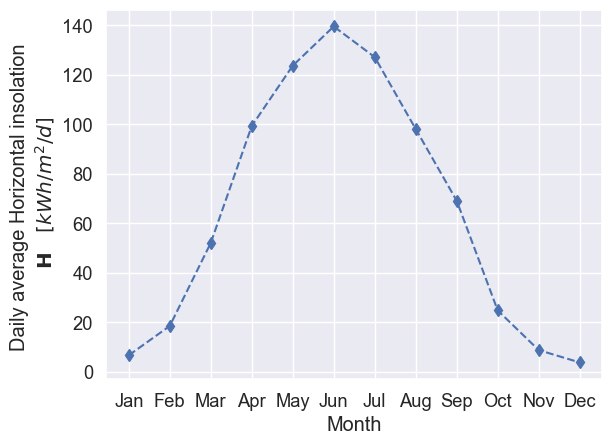

In [5]:
fig, ax = plt.subplots()
H_month.plot(x="Date", y="GHI", xlabel="Month",
               linestyle="--", color="b", marker="d", 
               ylabel="Daily average Horizontal insolation \n $\mathbf{H}\quad \\left[kWh/m^2/d\\right]$", ax=ax, legend=None)
xtick_label = list(month_number.keys())
ax.set_xticks(range(1,13))
ax.set_xticklabels(xtick_label); 

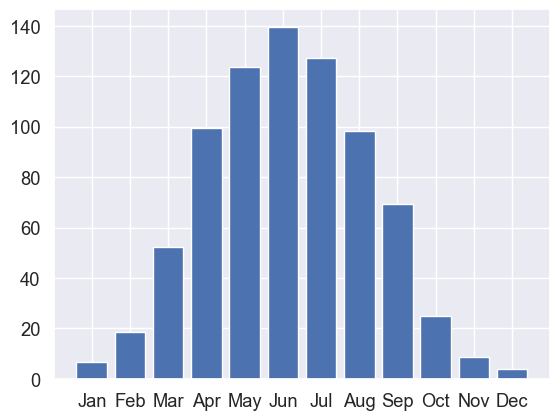

In [6]:
fig, ax = plt.subplots()
ax.bar(H_month["Date"], H_month["GHI"], color="b")
ax.set_xticks(range(1,13))
ax.set_xticklabels(xtick_label); 

# 1.c Optimal tilt angle

In [15]:
tilt_data = pd.read_csv('../data/tilt-graphdata.csv', skiprows=1, header=None, names=["tilt", "GHI"])
print(tilt_data.head())
# tilt_data.sort_values(by="tilt", inplace=True)
tilt_data

   tilt          GHI
0    10  308953000.0
1    20  335050000.0
2    30  351644000.0
3    40  358027000.0
4    50  354313000.0


,tilt,GHI
0,10,308953000.0
1,20,335050000.0
2,30,351644000.0
3,40,358027000.0
4,50,354313000.0
5,60,340289000.0
6,70,316083000.0
7,80,282850000.0
8,90,242025000.0


(10.0, 90.0)

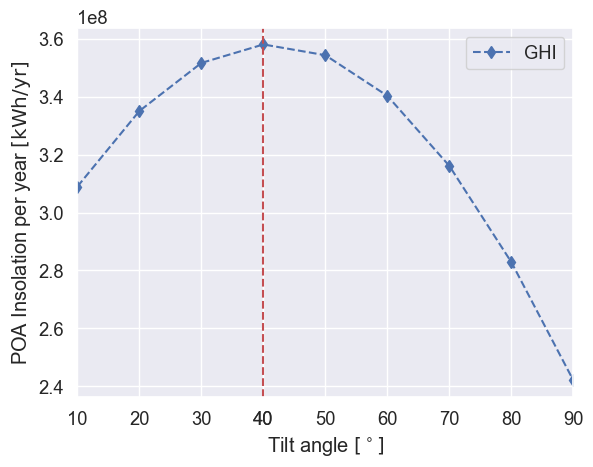

In [21]:
fig, ax = plt.subplots()

tilt_data.plot(x="tilt", y="GHI", ax=ax, linestyle="--", marker="d", color="b")
ax.set_xlabel(r"Tilt angle $[^\circ]$")
ax.set_ylabel(r"POA Insolation per year $[\mathrm{kWh/yr}]$")

maxid = tilt_data.GHI.idxmax()
ax.axvline(x=tilt_data.tilt[maxid], color='r', linestyle='--')
xticks = ax.get_xticks()

xticks = np.append(xticks, tilt_data.tilt[maxid])
xticks.sort()
ax.set_xticks(xticks)
ax.set_xlim(10, 90)

In [ ]:
# cos 𝜃 = cos 𝛽 cos 𝜃𝑧 + sin 𝛽 sin 𝜃𝑧 cos(𝛾𝑠 − 𝛾)
# Rb = cos 𝜃 / cos 𝜃𝑧 = 
#    = cos 𝛽 + sin 𝛽 tan 𝜃𝑧 cos(𝛾𝑠 − 𝛾)

gamma_s = 0 # south azimuth angle in radians

beta = 25 * np.pi/180 # tilt angle in radians

Rb = lambda beta, gamma: np.cos(beta) + np.sin(beta) * np.tan(gamma) * np.cos(gamma_s - gamma)


NameError: name 'theta' is not defined